In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.datasets import mnist

import random

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
X_train = np.float64(X_train)/255
X_test = np.float64(X_test)/255

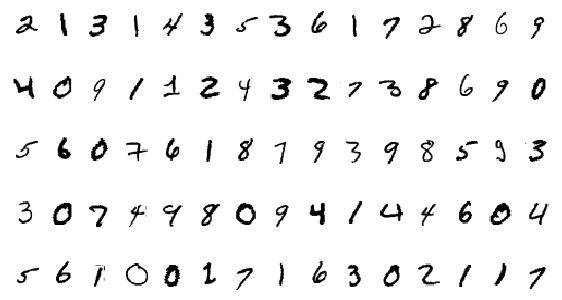

In [ ]:
plt.figure(figsize = (7,4), dpi=100)
k0 = 5
k1 = k0 + 10
nk = k0 * k1
for i in range(k0, nk + k0):
  plt.subplot(k0, k1, i-k0+1)
  plt.imshow(X_train[i], cmap = plt.cm.binary,interpolation = 'nearest')
  plt.axis('off')

plt.show()

In [ ]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

X, y = shuffle(X, y)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02857, random_state=42)
X_test, X_test2, y_test, y_test2 = train_test_split(X, y, test_size=0.02857, random_state=42)

print(np.shape(X_train))
print(np.shape(y_train))

print(np.shape(X_test))
print(np.shape(y_test))

print(np.shape(X_test2))
print(np.shape(y_test2))

(68000, 28, 28)
(68000,)
(68000, 28, 28)
(68000,)
(2000, 28, 28)
(2000,)


In [ ]:
def plot_The_images(X, y, idx):
  for i in range(idx, idx+5):
    plt.subplot(1,5, i-idx+1)
    plt.imshow(X[i], cmap=plt.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.title('label : %d' %y[i])
  plt.show()

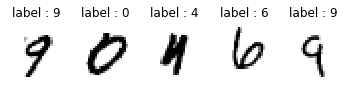

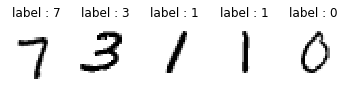

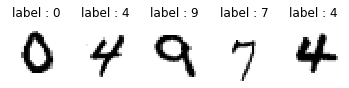

In [ ]:
for k in range(25,36,5):
  plot_The_images(X_train, y_train,k)

# 2 Construction du modèle

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from os import name
modele = keras.Sequential([
    layers.Flatten(input_shape=(28,28), name='Input_Layers'),
    layers.Dense(200,activation='sigmoid', name='Hidden_Layer1'),
    layers.Dense(100, activation='tanh', name='Hidden_Layer2'),
    layers.Dense(10, name='Output_Layer')
                           ])

In [ ]:
modele.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layers (Flatten)      (None, 784)               0         
                                                                 
 Hidden_Layer1 (Dense)       (None, 200)               157000    
                                                                 
 Hidden_Layer2 (Dense)       (None, 100)               20100     
                                                                 
 Output_Layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


# 3 Compilation du modèle

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
#opt = keras.optimizers.SGD(learning_rate=0.01)

modele.compile(optimizer=opt, loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#4 Training du modèle

In [ ]:
from re import VERBOSE
batch_size = 64
epochs = 5
history = modele.fit(X_train, y_train,
                     epochs = epochs,
                     batch_size = batch_size,
                     verbose = 1,
                     validation_data = (X_test,y_test)
                     )

Epoch 1/5
1063/1063 [==============================] - 20s 16ms/step - loss: 0.2308 - accuracy: 0.9301 - val_loss: 0.1014 - val_accuracy: 0.9690
Epoch 2/5
1063/1063 [==============================] - 9s 8ms/step - loss: 0.1145 - accuracy: 0.9659 - val_loss: 0.0813 - val_accuracy: 0.9746
Epoch 3/5
1063/1063 [==============================] - 8s 8ms/step - loss: 0.1022 - accuracy: 0.9688 - val_loss: 0.0805 - val_accuracy: 0.9746
Epoch 4/5
1063/1063 [==============================] - 8s 8ms/step - loss: 0.0928 - accuracy: 0.9724 - val_loss: 0.0879 - val_accuracy: 0.9718
Epoch 5/5
1063/1063 [==============================] - 9s 8ms/step - loss: 0.0864 - accuracy: 0.9734 - val_loss: 0.0939 - val_accuracy: 0.9718


#5 Evaluation de la précision

In [ ]:
test_loss, test_acc = modele.evaluate(X_test, y_test, verbose=2)
print('\n Test accuracy : {0:.2f}%'.format(round(test_acc*100,2)))
print('\n Test loss : {0:.2e}%'.format(test_loss))

2125/2125 - 5s - loss: 0.0939 - accuracy: 0.9718 - 5s/epoch - 2ms/step

 Test accuracy : 97.18%

 Test loss : 9.39e-02%


#6 Faire des prédictions

In [ ]:
probability_modele = tf.keras.Sequential([modele, tf.keras.layers.Softmax()])
y_predict = probability_modele.predict(X_test2)

63/63 [==============================] - 0s 2ms/step


In [ ]:
def f_predict(idx, predict_array):
  valeur = np.argmax(predict_array[idx])
  return valeur

In [ ]:
print(y_predict[5])
print(' ')
print(f_predict(5,y_predict))
print(y_test2[5])

[9.8056686e-01 4.1588228e-06 3.8097974e-06 3.0919363e-08 6.7351342e-05
 1.6499367e-03 1.0599912e-02 7.5918829e-06 6.4546117e-03 6.4574438e-04]
 
0
0


In [ ]:
class_names = ['zero','Un', 'Deux','Trois', 'Quatre' ,'Cinq', 'Six', 'Sept','Huit','Neuf']

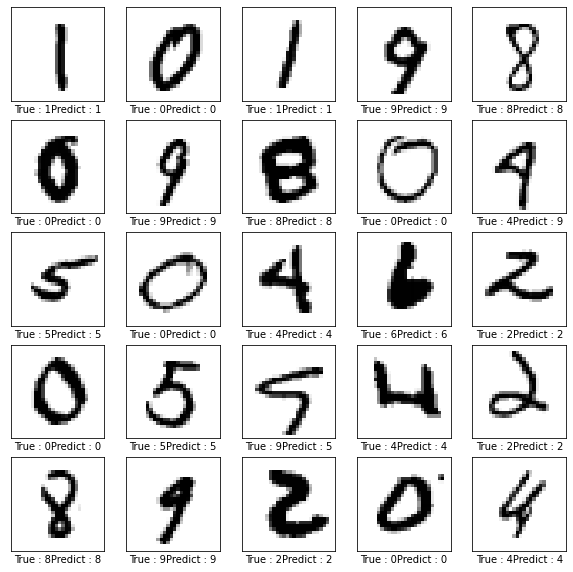

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  img = X_test2[i]
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel('True : '+str(y_test2[i]) +'Predict : '+str(f_predict(i, y_predict)))

plt.show()

In [ ]:
def plot_images_histogramme(i, predict_array , true_label, img):
  true_label, img = true_label[i], img[i]

  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap = plt.cm.binary)

  predicted_label = np.argmax(predict_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color ='red'

  plt.xlabel('{} {:2.0f}% ({}) '.format(class_names[predicted_label],
                                  100*np.max(predict_array),
                                  class_names[true_label],
                                  color = color))

In [ ]:
def plot_value_array(i, predict_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predict_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predict_array)

  thisplot[predicted_label].set_color('red')
  thisplot[predicted_label].set_color('blue')


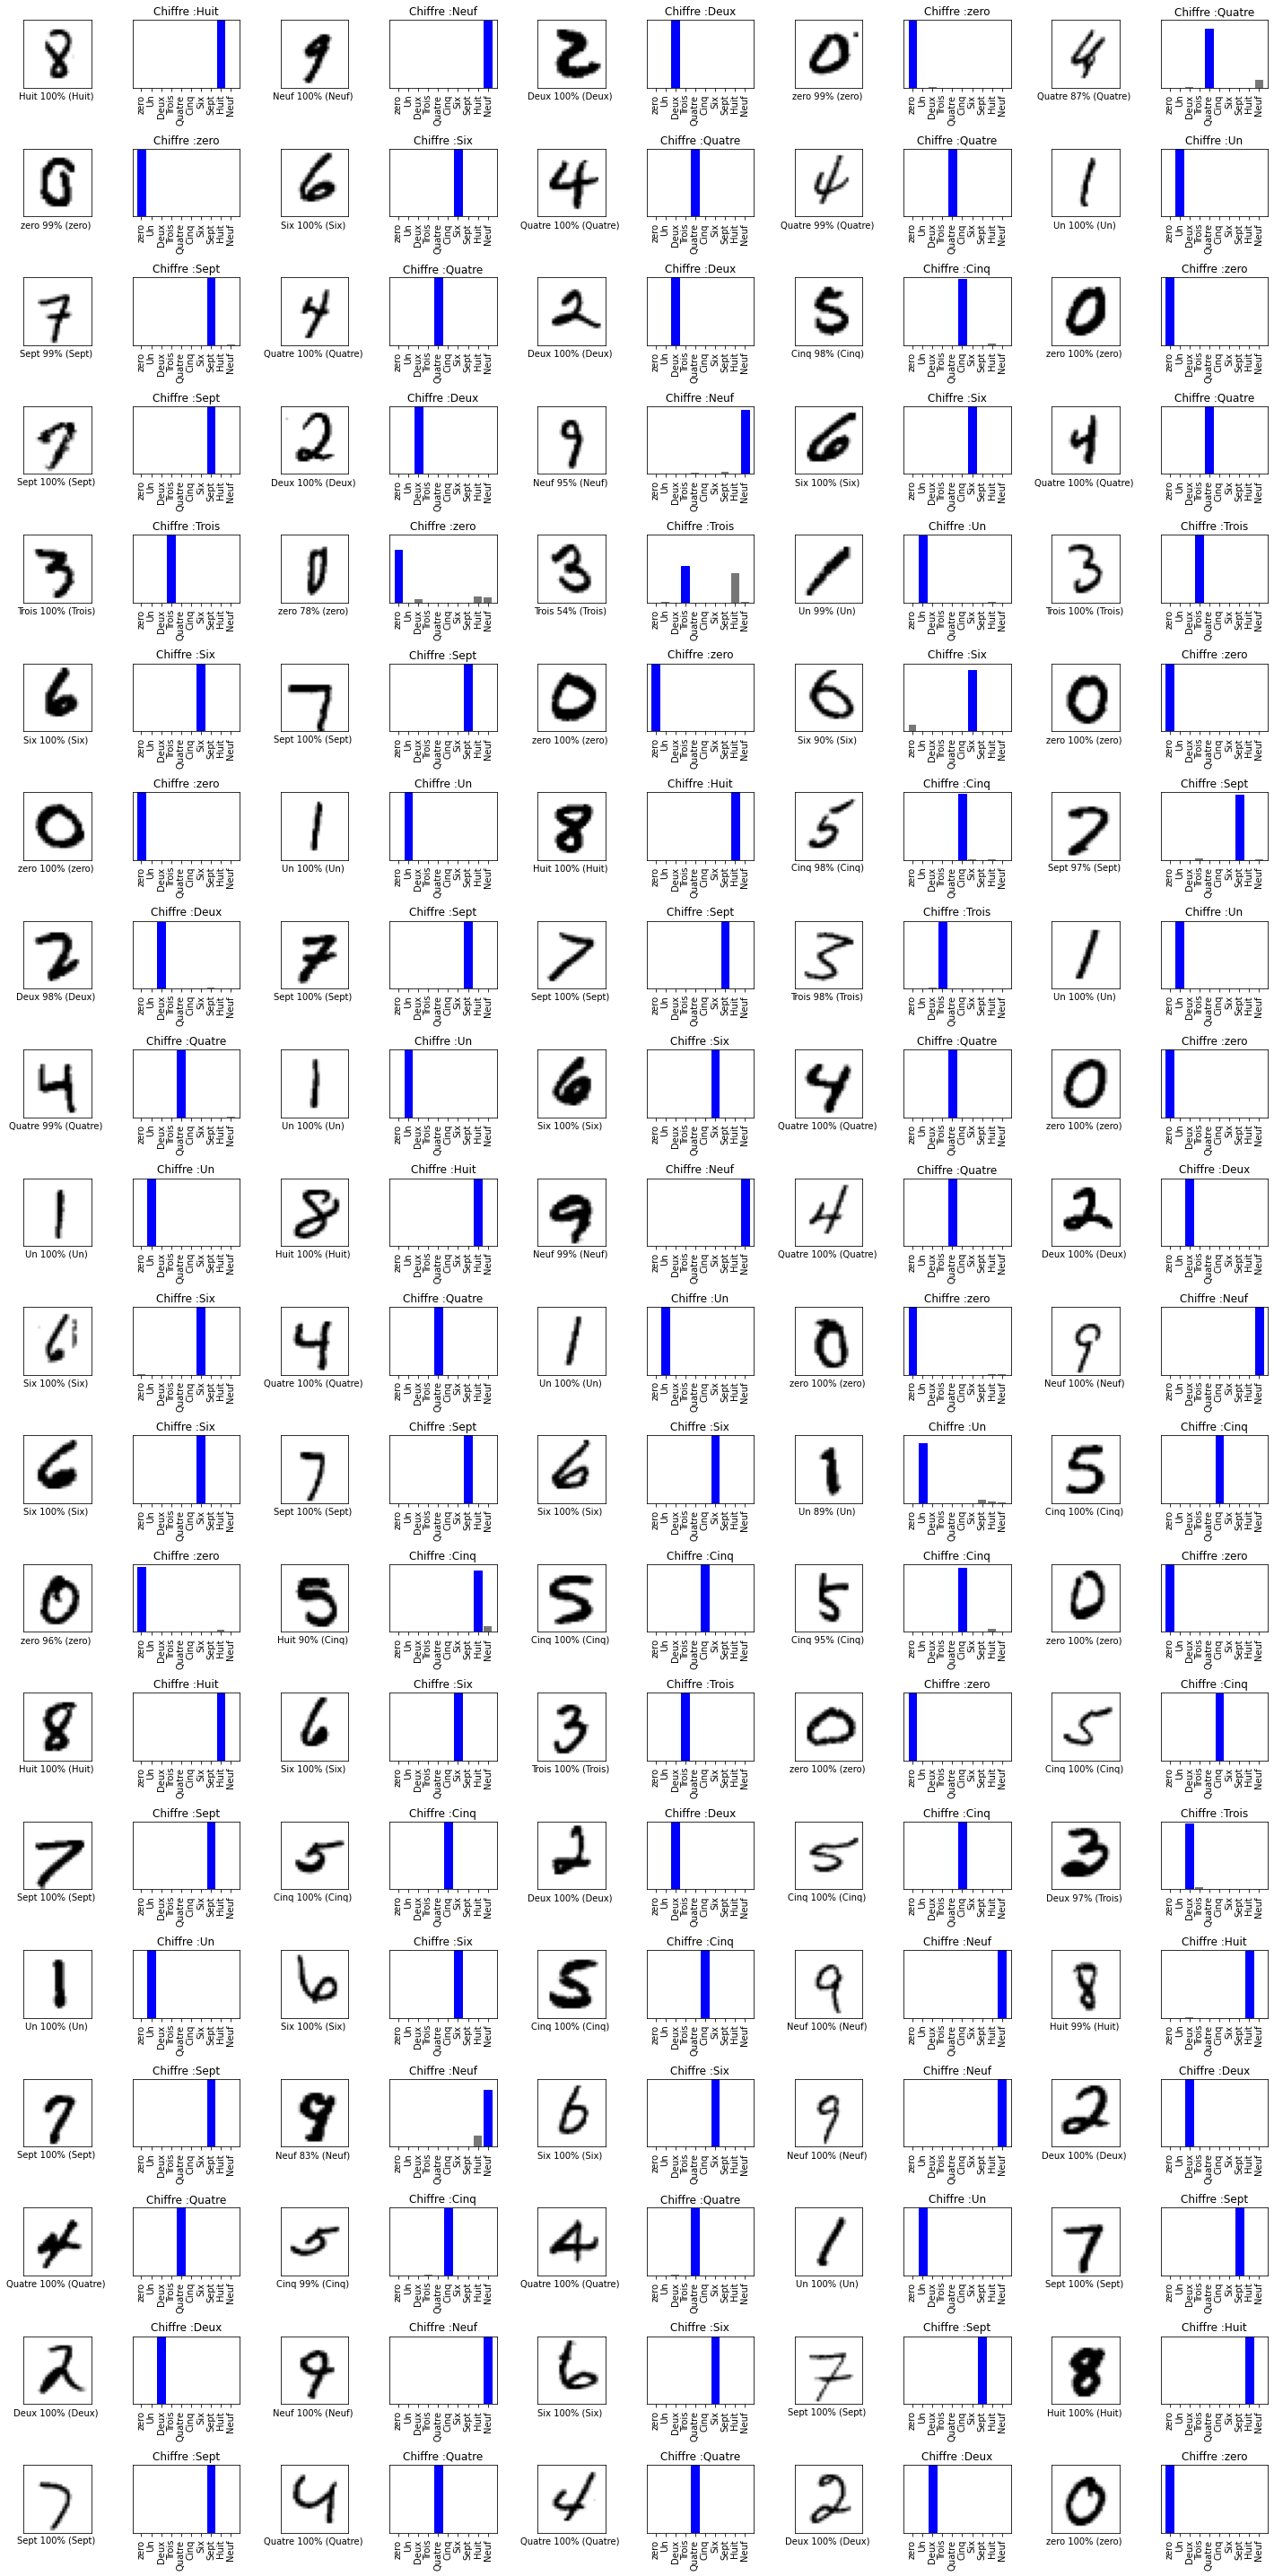

In [ ]:
num_rows = 20
num_cols = 5

num_images = num_rows*num_cols

N = 20 # <400

plt.figure(figsize =(2*2*num_cols, 2*num_rows))

for i in range(N, num_images +N):
  plt.subplot(num_rows, 2*num_cols, 2*(i-N)+1)
  plot_images_histogramme(i,y_predict[i], y_test2, X_test2)

  plt.subplot(num_rows, 2*num_cols, 2*(i-N)+2)
  plot_value_array(i, y_predict[i], y_test2)
  plt.title('Chiffre :'+class_names[y_test2[i]])
  _ = plt.xticks(range(10), class_names, rotation = 90)

plt.tight_layout()
plt.show()
